In [1]:
import os
from keras import preprocessing, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
data_path = '../data/kaggle_dogcat/train/'

#cats pictures
path_cats = []
train_cats = data_path + 'cats'
for path in os.listdir(train_cats):
    if '.jpg' in path:
        path_cats.append(os.path.join(train_cats, path))

#dogs pictures
path_dogs = []
train_dogs = data_path + "dogs"
for path in os.listdir(train_dogs):
    if '.jpg' in path:
        path_dogs.append(os.path.join(train_dogs, path))

len(path_cats), len(path_dogs)

(2000, 2000)

In [5]:
# load training set
training_set = np.zeros((3000, 150, 150, 3), dtype='float32')
for i in range(3000):
    if i < 1500:
        path = path_dogs[i]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_cats[i - 1500]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)

In [6]:
training_set.shape

(3000, 150, 150, 3)

In [7]:
validation_set = np.zeros((1000, 150, 150, 3), dtype='float32')
for i in range(1000):
    if i < 500:
        path = path_dogs[i + 1500]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_cats[i + 1000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)

In [8]:
validation_set.shape

(1000, 150, 150, 3)

In [9]:
#build model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
train_labels = np.zeros((1500,))
train_labels = np.concatenate((train_labels, np.ones((1500,))))
validation_labels = np.zeros((500,))
validation_labels = np.concatenate((validation_labels, np.ones((500,))))

In [12]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32)
validation_generator = train_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 30,
    validation_steps=50,
    validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 93s 926ms/step - loss: 0.3950 - acc: 0.8221 - val_loss: 0.5415 - val_acc: 0.7423
Epoch 2/30
100/100 [==============================] - 89s 892ms/step - loss: 0.3775 - acc: 0.8320 - val_loss: 0.5092 - val_acc: 0.7648
Epoch 3/30
100/100 [==============================] - 91s 910ms/step - loss: 0.3551 - acc: 0.8406 - val_loss: 0.5244 - val_acc: 0.7456
Epoch 4/30
100/100 [==============================] - 88s 881ms/step - loss: 0.3276 - acc: 0.8505 - val_loss: 0.5269 - val_acc: 0.7571
Epoch 5/30
100/100 [==============================] - 88s 876ms/step - loss: 0.3145 - acc: 0.8571 - val_loss: 0.5659 - val_acc: 0.7525
Epoch 6/30
100/100 [==============================] - 85s 850ms/step - loss: 0.2900 - acc: 0.8748 - val_loss: 0.5729 - val_acc: 0.7635
Epoch 7/30
100/100 [==============================] - 88s 882ms/step - loss: 0.2796 - acc: 0.8759 - val_loss: 0.6471 - val_acc: 0.7145
Epoch 8/30
100/100 [==============================] - 8

In [16]:
model.save('cats_and_dogs_small_1.h5')

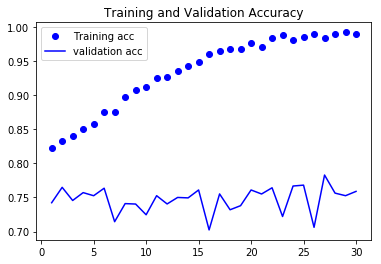

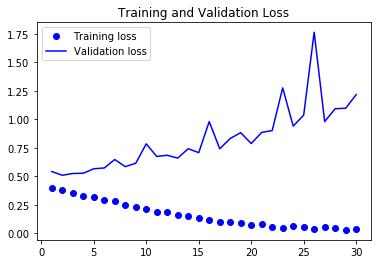

In [17]:
#plot error curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [18]:
#fix overfitting
datagen = preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

<Figure size 432x288 with 0 Axes>

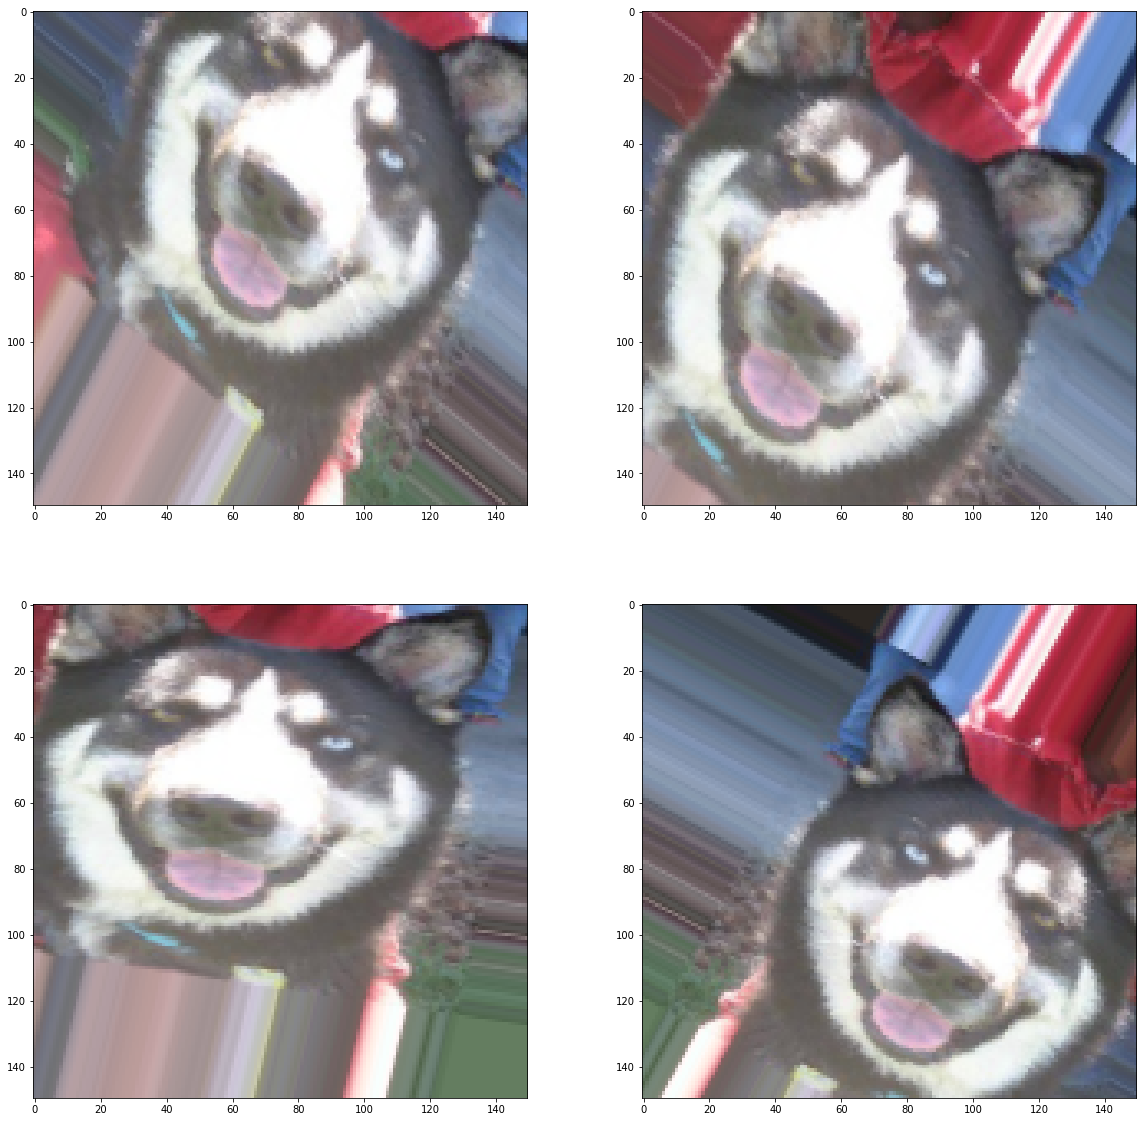

In [21]:
#visualize data
plt.clf()

fnames = [os.path.join(train_dogs, fname) for fname in os.listdir(train_dogs)]
img_path = fnames[3]
img = preprocessing.image.load_img(img_path, target_size=(150, 150))
x = preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.figure(figsize=(20, 20))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    plt.imshow(preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
#model building

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
  )
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32
  )

test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [26]:
#train
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 83s 826ms/step - loss: 0.4376 - acc: 0.7936 - val_loss: 0.5616 - val_acc: 0.7589
Epoch 2/30
100/100 [==============================] - 82s 815ms/step - loss: 0.4622 - acc: 0.7803 - val_loss: 0.4270 - val_acc: 0.7957
Epoch 3/30
100/100 [==============================] - 93s 930ms/step - loss: 0.4517 - acc: 0.7895 - val_loss: 0.4448 - val_acc: 0.7906
Epoch 4/30
100/100 [==============================] - 88s 882ms/step - loss: 0.4487 - acc: 0.7927 - val_loss: 0.5128 - val_acc: 0.7635
Epoch 5/30
100/100 [==============================] - 91s 907ms/step - loss: 0.4322 - acc: 0.7999 - val_loss: 0.4897 - val_acc: 0.7773
Epoch 6/30
100/100 [==============================] - 87s 869ms/step - loss: 0.4384 - acc: 0.7942 - val_loss: 0.4977 - val_acc: 0.7622
Epoch 7/30
100/100 [==============================] - 89s 887ms/step - loss: 0.4455 - acc: 0.7839 - val_loss: 0.4569 - val_acc: 0.7829
Epoch 8/30
100/100 [==============================] - 8

In [27]:
model.save('cats_and_dogs_small_2.h5')

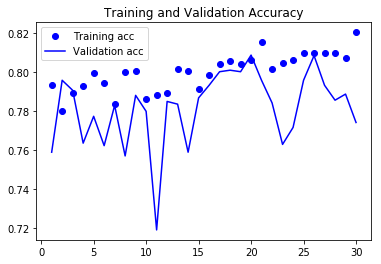

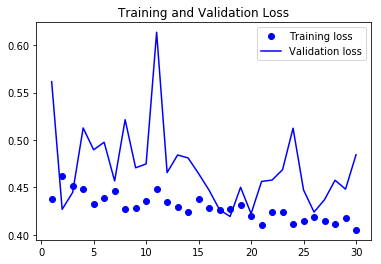

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()